In [ ]:
#!Name: Gosper glider gun
#!Author: Bill Gosper
#!The first known gun and the first known finite pattern with unbounded growth.
#!www.conwaylife.com/wiki/index.php?title=Gosper_glider_gun
#........................O
#......................O.O
#............OO......OO............OO
#...........O...O....OO............OO
#OO........O.....O...OO
#OO........O...O.OO....O.O
#..........O.....O.......O
#...........O...O
#............OO

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

plt.rcParams["figure.figsize"] = (14,11)
plt.rcParams["font.size"] = 20

In [71]:

def life_step(X):
    nbrs_count = sum(np.roll(np.roll(X, i, 0), j, 1)
                     for i in (-1, 0, 1) for j in (-1, 0, 1)
                     if (i != 0 or j != 0))
    return (nbrs_count == 3) | (X & (nbrs_count == 2))

def life_animation(X, dpi=10, frames=10, interval=300):
    X = np.asarray(X)
    assert X.ndim == 2
    X = X.astype(bool)
    count =[]

    X_blank = np.zeros_like(X)
    figsize = (X.shape[1] * 5. / dpi, X.shape[0] * 5. / dpi)

    fig = plt.figure(figsize=figsize, dpi=dpi)
    ax = fig.add_axes([0, 0, 1, 1], xticks=[], yticks=[], frameon=False)
    im = ax.imshow(X, interpolation='nearest')

    def init():
        im.set_data(X_blank)
        return (im,)

    def animate(i):
        im.set_data(animate.X)
        animate.X = life_step(animate.X)
        count.append(np.sum(animate.X))
        return (im,)
    animate.X = X

    anim = animation.FuncAnimation(fig, animate, init_func=init,
                                   frames=frames, interval=interval)
    

    return anim, count


In [72]:
glider_gun =\
[[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
 [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
 [1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
 [1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]

X = np.pad(glider_gun, ((10,10),(10,10)))
anim, count = life_animation(X, dpi=15, frames=180, interval=50)
anim.save('glider_gun.gif', writer="pillow")
plt.close()
HTML('<img src="glider_gun.gif">')


Text(0, 0.5, 'Number of the living cells')

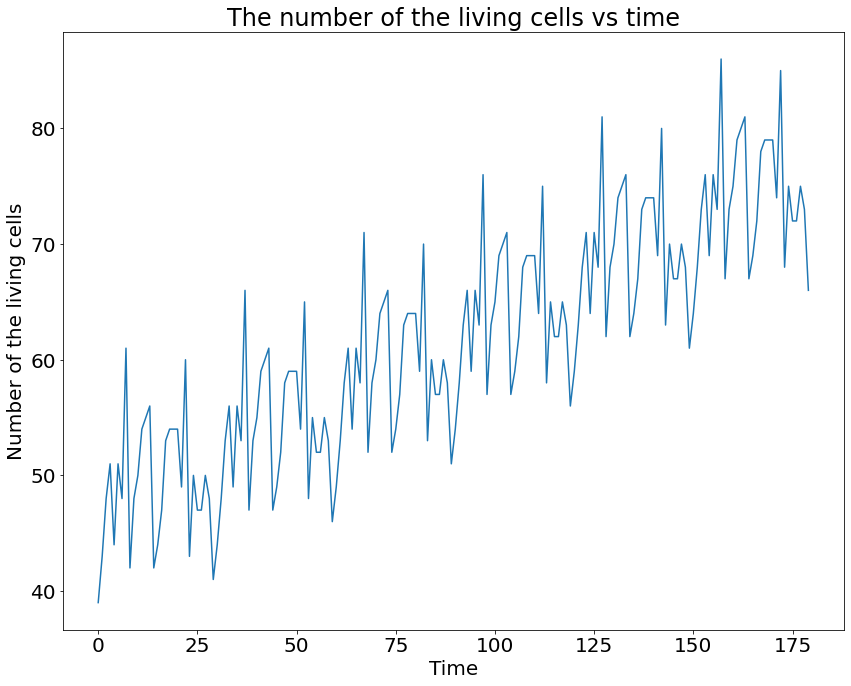

In [74]:
plt.plot(count)
plt.title('The number of the living cells vs time')
plt.xlabel('Time')
plt.ylabel('Number of the living cells')

In [75]:
unbounded = [[1, 1, 1, 0, 1],
             [1, 0, 0, 0, 0],
             [0, 0, 0, 1, 1],
             [0, 1, 1, 0, 1],
             [1, 0, 1, 0, 1]]

X2 = np.pad(unbounded, ((20,20),(20,20)))
anim, count = life_animation(X2, dpi=15, frames=180, interval=50)
anim.save('unbounded.gif', writer="pillow")
plt.close()
HTML('<img src="unbounded.gif">')

Text(0, 0.5, 'Number of the living cells')

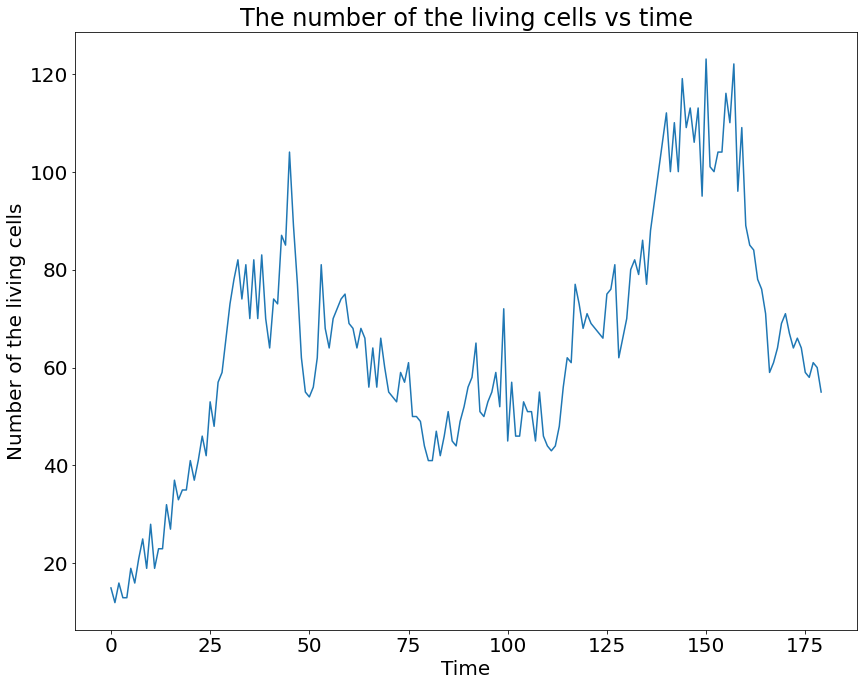

In [76]:
plt.plot(count)
plt.title('The number of the living cells vs time')
plt.xlabel('Time')
plt.ylabel('Number of the living cells')

In [77]:
glider = [[0, 0, 1],
             [1, 0, 1],
             [0, 1, 1]]

X3 = np.pad(glider, ((10,10),(10,10)))
anim, count = life_animation(X3, dpi=15, frames=180, interval=50)
anim.save('glider.gif', writer="pillow")
plt.close()
HTML('<img src="glider.gif">')

Text(0, 0.5, 'Number of the living cells')

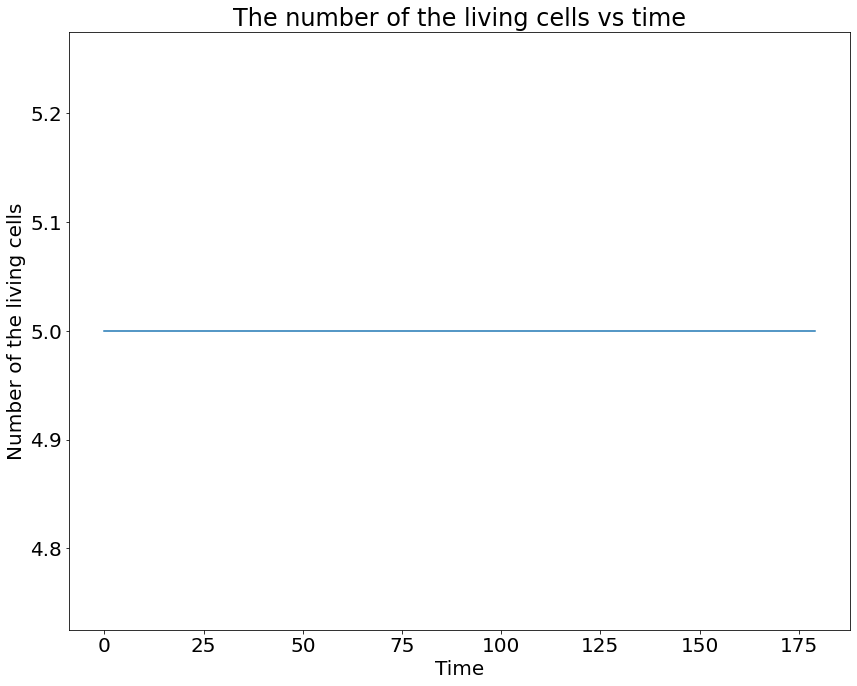

In [78]:
plt.plot(count)
plt.title('The number of the living cells vs time')
plt.xlabel('Time')
plt.ylabel('Number of the living cells')

In [90]:
%%writefile game_of_life.py

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

plt.rcParams["figure.figsize"] = (14,11)
plt.rcParams["font.size"] = 20

from mpi4py import MPI

comm = MPI.COMM_WORLD
size = comm.Get_size()
rank = comm.Get_rank()

def life_step(X):
    nbrs_count = sum(np.roll(np.roll(X, i, 0), j, 1)
                     for i in (-1, 0, 1) for j in (-1, 0, 1)
                     if (i != 0 or j != 0))
    return (nbrs_count == 3) | (X & (nbrs_count == 2))

def life_animation(X, dpi=10, frames=10, interval=300):
    X = np.asarray(X)
    assert X.ndim == 2
    X = X.astype(bool)
    count =[]

    X_blank = np.zeros_like(X)
    figsize = (X.shape[1] * 5. / dpi, X.shape[0] * 5. / dpi)

    fig = plt.figure(figsize=figsize, dpi=dpi)
    ax = fig.add_axes([0, 0, 1, 1], xticks=[], yticks=[], frameon=False)
    im = ax.imshow(X, interpolation='nearest')

    def init():
        im.set_data(X_blank)
        return (im,)

    def animate(i):
        im.set_data(animate.X)
        animate.X = life_step(animate.X)
        count.append(np.sum(animate.X))
        return (im,)
    animate.X = X

    anim = animation.FuncAnimation(fig, animate, init_func=init,
                                   frames=frames, interval=interval)
    
    return anim, count

glider_gun =\
[[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
 [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
 [1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
 [1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]

X = np.pad(glider_gun, ((10,10),(10,10)))
N = X.size

N_per_rank = N // size         #number of intervals calculated by each process
if rank == size-1:
    N_per_rank = N -(N_per_rank * (size -1))
a_per_rank = rank*N_per_rank
b_per_rank = a_per_rank + N_per_rank

start = MPI.Wtime()
anim_per_rank, count = life_animation(X[a_per_rank:b_per_rank], dpi=15, frames=180, interval=50)
anim = comm.gather(anim_per_rank, op = MPI.SUM, root =0)
anim.save('glider_gun2.gif', writer="pillow")
plt.close()

if rank ==0:
    end = MPI.Wtime()
    print((end-start))


Overwriting game_of_life.py


In [91]:
exe_time = []
N_processes = np.arange(1,11)
for i in N_processes:
    add = !mpiexec -n {i} python game_of_life.py
    exe_time.append(float(add[0]))
    print(f"Process {i} with time {add[0]}")

ValueError: could not convert string to float: 'Traceback (most recent call last):'

In [ ]:
#Plot the speedup vs number of processors 
plt.plot(N_processes,  exe_time[0] / np.array(exe_time))
plt.title('Speedup vs number of processes')
plt.xlabel('Number of processes')
plt.ylabel('Speedup')
plt.grid(True)